In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis
from tqdm.notebook import tqdm

df1 = pd.read_csv('ShelvingIntensityRawDataAmp10.csv')
ShelvingIntensityAverageArray1 = df1['ShelvingIntensityAverageAmp10'].tolist()
ShelvingIntensityUncertaintyArray1 = df1['ShelvingIntensityUncertaintyAmp10'].tolist()
ShelvingIntensityAverageArray_cleaned1 = np.delete(ShelvingIntensityAverageArray1, [11,22,33,44,55,66,77,88])
ShelvingIntensityUncertaintyArray_cleaned1 = np.delete(ShelvingIntensityUncertaintyArray1, [11,22,33,44,55,66,77,88])

df2 = pd.read_csv('ShelvingIntensityRawDataAmp05.csv')
ShelvingIntensityAverageArray2 = df2['ShelvingIntensityAverageAmp05'].tolist()
ShelvingIntensityUncertaintyArray2 = df2['ShelvingIntensityUncertaintyAmp05'].tolist()
ShelvingIntensityAverageArray_cleaned2 = np.delete(ShelvingIntensityAverageArray2, [11,22,33,44,55,66,77,88])
ShelvingIntensityUncertaintyArray_cleaned2 = np.delete(ShelvingIntensityUncertaintyArray2, [11,22,33,44,55,66,77,88])

df3 = pd.read_csv('ShelvingIntensityRawDataAmp025.csv')
ShelvingIntensityAverageArray3 = df3['ShelvingIntensityAverageAmp025'].tolist()
ShelvingIntensityUncertaintyArray3 = df3['ShelvingIntensityUncertaintyAmp025'].tolist()
ShelvingIntensityAverageArray_cleaned3 = np.delete(ShelvingIntensityAverageArray3, [11,22,33,44,55,66])
ShelvingIntensityUncertaintyArray_cleaned3 = np.delete(ShelvingIntensityUncertaintyArray3, [11,22,33,44,55,66])

ShelvingIntensityAverageArray_cleaned3_padded = np.pad(ShelvingIntensityAverageArray_cleaned3, (20,0), mode = 'constant', constant_values = 0)
ShelvingIntensityUncertaintyArray_cleaned3_padded = np.pad(ShelvingIntensityUncertaintyArray_cleaned3, (20,0), mode = 'constant', constant_values = 0)

In [2]:
### ---------------------- INITIALISE PLOTTING STYLE ---------------------- ###

## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# set_plotting_style()


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')


Initialising plotting style...
Success! Plotting style initialised.
Initialising plotting style...
Success! Plotting style initialised.


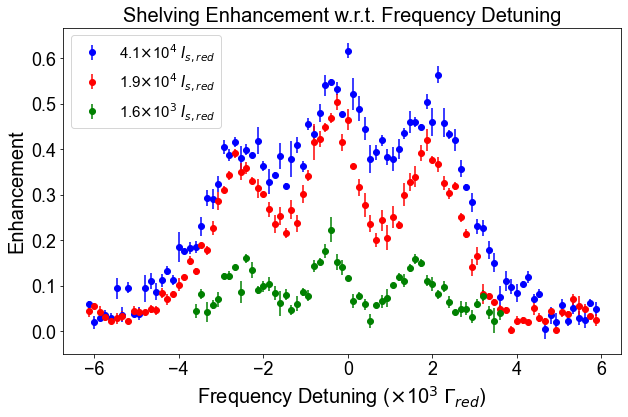

In [3]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuningGamma, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'4.1$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuningGamma, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'1.9$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuningGamma[-72:-17], ShelvingIntensityAverageArray_cleaned3[:-16], yerr=ShelvingIntensityUncertaintyArray_cleaned3[:-16], fmt='o', color='green',label=r'1.6$\times$10$^3$ $I_{s,red}$')
plt.legend(loc='upper left')

plt.title('Shelving Enhancement w.r.t. Frequency Detuning')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning ($\times$10$^3$ $\Gamma_{red}$)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuningDPI300.png', dpi=300)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuningDPI300.pdf',dpi=300)

In [4]:
PowerAmp10 = 65 #mW
IntensityAmp10 = 2*PowerAmp10/(np.pi*0.58**2) #mW/cm^2
IntensityAmp10SaturationRed = IntensityAmp10*1e3/3

IntensityAmp10SaturationRed

41003.05707876813

In [5]:
PowerAmp05 = 30 #mW
IntensityAmp05 = 2*PowerAmp05/(np.pi*0.58**2) #mW/cm^2
IntensityAmp05SaturationRed = IntensityAmp05*1e3/3

IntensityAmp05SaturationRed

18924.487882508365

In [6]:
PowerAmp025 = 2.5 #mW
IntensityAmp025 = 2*PowerAmp025/(np.pi*0.58**2) #mW/cm^2
IntensityAmp025SaturationRed = IntensityAmp025*1e3/3

IntensityAmp025SaturationRed

1577.040656875697

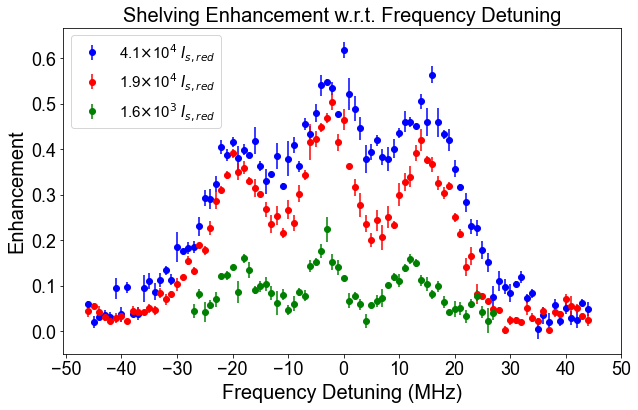

In [7]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'4.1$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'1.9$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuning[-72:-17], ShelvingIntensityAverageArray_cleaned3[:-16], yerr=ShelvingIntensityUncertaintyArray_cleaned3[:-16], fmt='o', color='green',label=r'1.6$\times$10$^3$ $I_{s,red}$')
plt.legend(loc='upper left')

plt.xticks(np.arange(-50, 51, 10))
plt.title('Shelving Enhancement w.r.t. Frequency Detuning')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning (MHz)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuning2DPI300.png', dpi=300)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuning2DPI300.pdf',dpi=300)